# ETL - Clinical Trial Trends

## Objectives 
- Extract: To load the CSV file from Kaggle into a Pandas DataFrame
- Transform: To handle all missing values, normalise column names, remove duplicates and convert data types.
- Load: To save the cleaned dataset into a new CSV file, ready for EDA.

## Inputs

- Overview Clinical Trial Trends dataset from [Kaggle](https://www.kaggle.com/datasets/thedevastator/a-quick-overview-of-clinical-trials)

## Outputs

INSERT CLEANED DATASET

## Additional Comments

- The Clinical Trials dataset gives an overview of clinical trails over the years, from multiple sponsors.

_____

## Extract - Load and Clean Dataset

The clinical trials dataset will be loaded into this notebook, to gain insight into the data and conduct data cleaning.

In [40]:
# Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load dataset and convert to DataFrame
df = pd.read_csv('../data/inputs/raw/clinical_trials.csv')
df.head()

,index,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,RATIONALE: Drugs used in chemotherapy use diff...,1997,7,Phase 2,75,Completed,Leukemia
1,1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,RATIONALE: Drugs used in chemotherapy use diff...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",RATIONALE: Vaccines made from a person's white...,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,RATIONALE: Drugs used in chemotherapy use diff...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",RATIONALE: Drugs used in chemotherapy use diff...,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


In [42]:
# Investigate the size of the dataset
df.shape

(13748, 11)

In [84]:
import os

# Ensure the output directory exists (assistance from CoPilot)
output_dir = '../data/outputs'
os.makedirs(output_dir, exist_ok=True)

In [54]:
# Take a random sample of 10,000 entries and overwrite the original DataFrame
df = df.sample(n=10000, random_state=28)

# Display the first few rows of the sampled dataset
df.head()

,index,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
8746,8746,NCT00442871,GSK,"An Open-Label, Non-Randomized Pharmacokinetic ...",The main purpose of this study is to compare h...,2006,9,Phase 1,29,Completed,"Purpura, Thrombocytopenic, Idiopathic"
1499,1499,NCT03600805,Sanofi,"A Randomized, Double-blind, Placebo-controlled...",Primary Objective: To evaluate the efficacy of...,2018,11,Phase 3,360,Recruiting,Giant Cell Arteritis
2132,2132,NCT00408954,Pfizer,A Multi Center Randomized Cross Over Double Bl...,This is a pilot study to generate hypotheses a...,2007,3,Phase 2,27,Completed,Prostatic Hyperplasia
4422,4422,NCT00785083,Novartis,"A Double-blind, Randomized, Placebo-controlled...",This study will evaluate the effect of FTY720 ...,2008,9,Phase 2,36,Completed,Asthma
5352,5352,NCT02047656,Novartis,"A Two Part Study Including a Randomized, Doubl...",This study is designed to enable optimal dose ...,2013,8,Phase 1,93,Terminated,Hypertension


In [61]:
# Check dataframe has been sampled correctly
df.shape

(10000, 10)

The sampled dataset will now be investigated and cleaned

In [ ]:
# Remove duplicated index column by name
df = df.drop(columns=['index'])

In [62]:
# Check duplicated index column has been removed
df.columns

Index(['NCT', 'Sponsor', 'Title', 'Summary', 'Start_Year', 'Start_Month',
       'Phase', 'Enrollment', 'Status', 'Condition'],
      dtype='object')

In [65]:
# Check proprerties of columns
df.dtypes

NCT            object
Sponsor        object
Title          object
Summary        object
Start_Year      int64
Start_Month     int64
Phase          object
Enrollment      int64
Status         object
Condition      object
dtype: object

In [70]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

NCT              0
Sponsor          0
Title          101
Summary          0
Start_Year       0
Start_Month      0
Phase          198
Enrollment       0
Status           0
Condition        0
dtype: int64


Rows with missing values equate for approx. 2% of the dataset so there isn't a significant dataloss. 

In [83]:
# Remove rows with any missing values (assistance from CoPilot)
df = df.dropna()

# Verify the changes
print(df.isnull().sum())

NCT            0
Sponsor        0
Title          0
Summary        0
Start_Year     0
Start_Month    0
Phase          0
Enrollment     0
Status         0
Condition      0
dtype: int64


In [82]:
# Check if there are any duplicate rows (assistance from CoPilot)
duplicates = df.duplicated()
print("Are there any duplicate rows?", duplicates.any())

Are there any duplicate rows? False


NCT - represents the National Clinical Trial number, which doesn't serve a purpose for the analysis so it will be removed. 

In [87]:
# Drop NCT column as it does not serve a purpose for the analysis
df = df.drop(columns=['NCT'])

In [88]:
# Check the DataFrame info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9719 entries, 8746 to 5735
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sponsor      9719 non-null   object
 1   Title        9719 non-null   object
 2   Summary      9719 non-null   object
 3   Start_Year   9719 non-null   int64 
 4   Start_Month  9719 non-null   int64 
 5   Phase        9719 non-null   object
 6   Enrollment   9719 non-null   int64 
 7   Status       9719 non-null   object
 8   Condition    9719 non-null   object
dtypes: int64(3), object(6)
memory usage: 759.3+ KB


## Transform - Feature Engineering

Feature engineering will be carried out on the dataset, so its enhanced for visualisations.

Create new columns to increase clarity of specific features of the dataset to all audiences.

- Start_Month_Name = Month name when the Clinical Trial began
- Start_Year_Period = Time period when Clinical Trial began, categorised by 5 year increments.
- Enrolled_Participants = The total number of Clinical Trial participants enrolled fall within that range.

In [92]:
# Import the calendar module to convert month numbers to names
import calendar

# Column is named 'Start_Month' and contains numbers 1-12 (assistance from CoPilot)
df['Start_Month_Name'] = df['Start_Month'].apply(lambda x: calendar.month_name[x])

# Display the first few rows to verify the change (assistance from CoPilot)
df[['Start_Month', 'Start_Month_Name']].head()

,Start_Month,Start_Month_Name
8746,9,September
1499,11,November
2132,3,March
4422,9,September
5352,8,August


Start_Year column will be put into bins to improve the readability of the distribution.

In [97]:
# Create a new column for the start year period categorised by 5-year increments
df['Start_Year_Period'] = pd.cut(df['Start_Year'], bins=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
                                 labels=["1981-1985", "1986-1990", "1991-1995", "1996-2000", "2001-2005", "2006-2010", "2011-2015", "2016-2020"], right=True)

In [99]:
# Display the first few rows to verify the new column (assistance from ChatGPT)
df[['Start_Year', 'Start_Year_Period']].head()

,Start_Year,Start_Year_Period
8746,2006,2006-2010
1499,2018,2016-2020
2132,2007,2006-2010
4422,2008,2006-2010
5352,2013,2011-2015


Enrollment column will be put into bins to improve the readability of the distribution, and enable more balanced visualisations to be created. 

In [104]:
# Split range into equal-width intervals
df['Enrolled_Participants'] = pd.cut(df['Enrollment'], bins=5)

# Create quantile-based bins for the Enrollment column
df['Enrolled_Participants'] = pd.qcut(df['Enrollment'], q=5)

# Create bins with equal number of records in each bin
df['Enrolled_Participants'] = pd.qcut(df['Enrollment'], q=5)

# Bin distribution for improved readability
bins = [0, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
labels = ["<50", "50-99", "100-499", "500-999", "1K-5K", "5K-10K", "10K-50K", "50K+"]
df['Enrolled_Participants'] = pd.cut(df['Enrollment'], bins=bins, labels=labels)

# Display the first few rows to verify the changes
df[['Enrollment', 'Enrolled_Participants']].head()

,Enrollment,Enrolled_Participants
8746,29,<50
1499,360,100-499
2132,27,<50
4422,36,<50
5352,93,50-99


The Enrollment column will not be used for visualisations or machine learning, so there's no need to check for skewness.

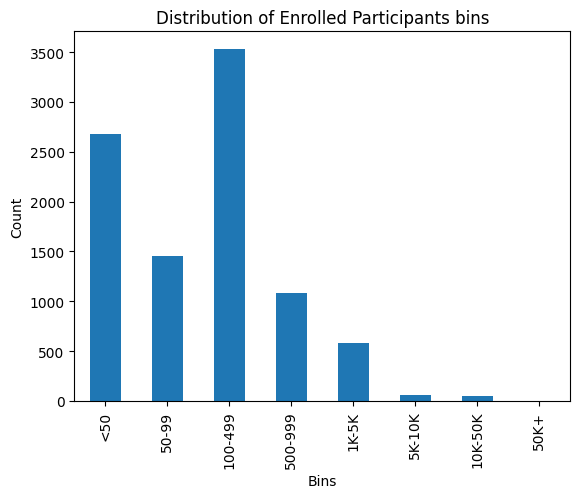

In [112]:
# Visualise the distribution of the 'Enrolled_Participants' column using a bar plot
import matplotlib.pyplot as plt
df['Enrolled_Participants'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Enrolled Participants bins')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.show()


In [111]:
df['Enrolled_Participants'].value_counts(normalize=True)


Enrolled_Participants
100-499    0.374192
<50        0.284034
50-99      0.153618
500-999    0.115161
1K-5K      0.061659
5K-10K     0.006357
10K-50K    0.004767
50K+       0.000212
Name: proportion, dtype: float64

As the smaller bins dominate, the bins will later be adjusted for future modelling purposes.